In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np

In [3]:
from fastai.imports import *
from fastai.vision import *

In [4]:
os.environ['CUDA_DEVICE_ORDER']="PCI_BUS_ID"
os.environ['CUDA_VISIBLE_DEVICES']='0'
torch.cuda.set_device(0)

In [5]:
torch.cuda.empty_cache()
torch.cuda.current_device()

0

In [6]:
#set seed
np.random.seed(2)

In [7]:
data = ImageDataBunch.from_folder(path = './classifier-images/imageset_divided/', 
                                  train = 'train', valid = 'validation', 
                                  ds_tfms=get_transforms(do_flip=False), size=64)
data


ImageDataBunch;

Train: LabelList (3050 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
edge,edge,edge,edge,edge
Path: classifier-images/imageset_divided;

Valid: LabelList (1018 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
edge,edge,edge,edge,edge
Path: classifier-images/imageset_divided;

Test: None

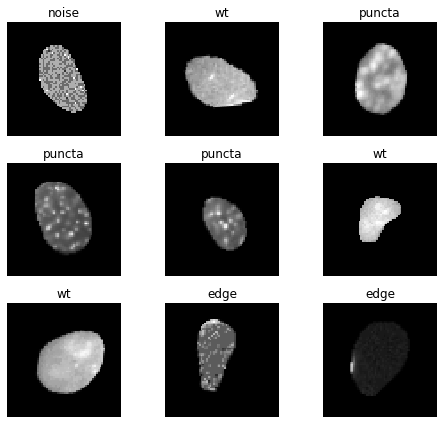

In [8]:
data.show_batch(rows=3,figsize=(7,6))

In [9]:
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (3050 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
edge,edge,edge,edge,edge
Path: classifier-images/imageset_divided;

Valid: LabelList (1018 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
edge,edge,edge,edge,edge
Path: classifier-images/imageset_divided;

Test: None

In [10]:
#data.export('./databunch_export/export_2x2binning.pkl')

In [11]:
learn_34 = cnn_learner(data, models.resnet34, metrics=accuracy)

In [12]:
learn_34.fit_one_cycle(6)

epoch,train_loss,valid_loss,accuracy,time
0,0.798240,0.641761,0.771120,00:06
1,0.484133,0.280289,0.909627,00:05
2,0.382431,0.268770,0.905697,00:05
3,0.309849,0.253429,0.908644,00:05
4,0.258726,0.232214,0.919450,00:05
5,0.230569,0.226095,0.919450,00:05


In [13]:
interp = ClassificationInterpretation.from_learner(learn_34)

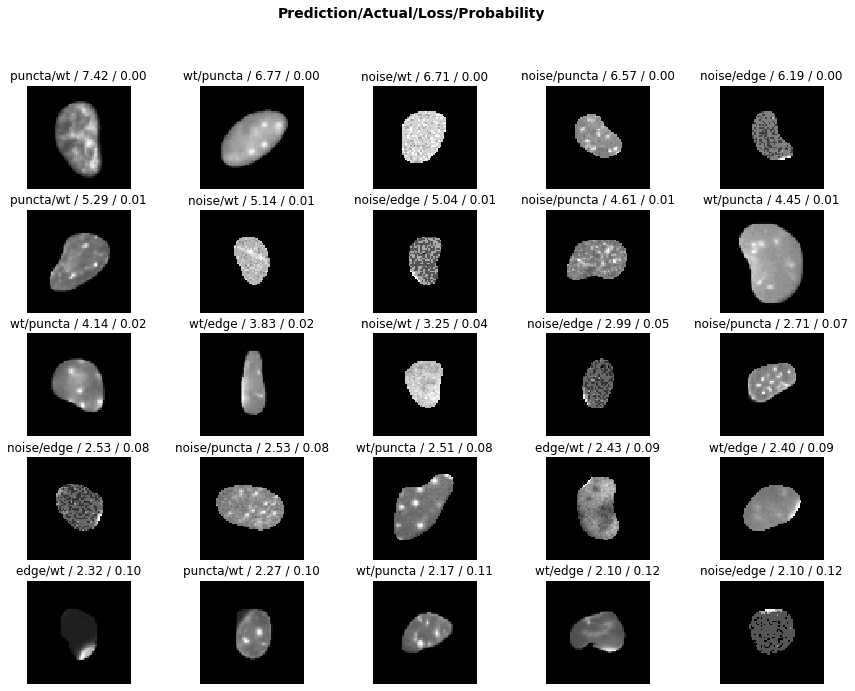

In [14]:
interp.plot_top_losses(25,figsize=(15,11))

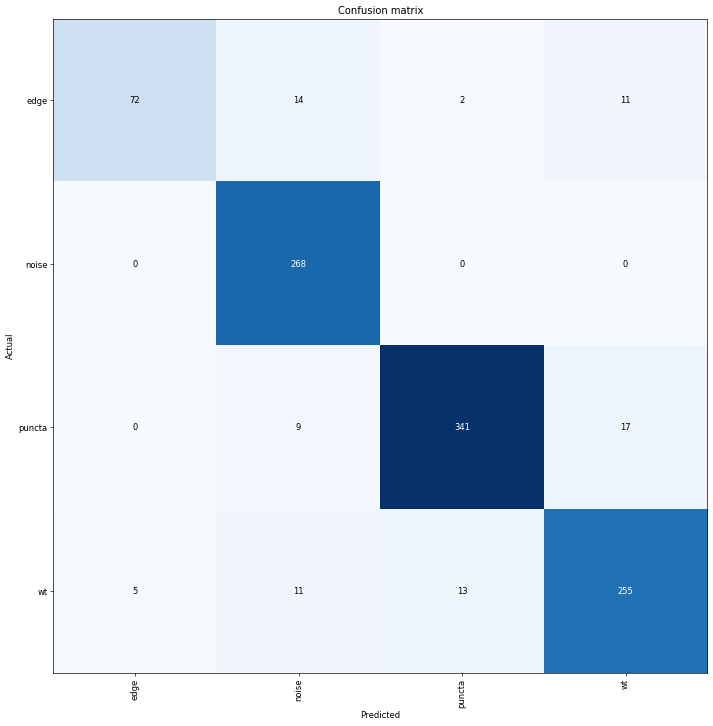

In [15]:
interp.plot_confusion_matrix(figsize=(12,12),dpi=60)

In [16]:
learn_34.save('stage-1-resnet34-sriram_2x2binning')

In [17]:
learn_34.unfreeze()

In [18]:
learn_34.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,time
0,0.228464,0.321431,0.914538,00:06
1,0.249587,0.430156,0.877210,00:05
2,0.249418,0.416864,0.872299,00:05
3,0.218805,0.348607,0.884086,00:05
4,0.191726,0.356702,0.884086,00:05
5,0.173998,0.189050,0.933202,00:06
6,0.165563,0.197456,0.935167,00:05
7,0.130599,0.171443,0.935167,00:06
8,0.103810,0.176417,0.944990,00:06
9,0.090484,0.170556,0.943026,00:05


In [19]:
learn_34.save('resnet34-2x2binning')

In [20]:
learn_34.export('export-2x2binning.pkl')

In [21]:
learn_34.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,time
0,0.077635,0.182527,0.938114,00:06
1,0.115678,0.337653,0.905697,00:05
2,0.155539,0.275240,0.916503,00:05
3,0.159447,0.320615,0.913556,00:06
4,0.151511,0.407820,0.882122,00:06
5,0.138174,0.184438,0.943026,00:05
6,0.128815,0.182290,0.946955,00:06
7,0.101381,0.180483,0.943026,00:05
8,0.078056,0.193241,0.939096,00:06
9,0.066577,0.190580,0.937132,00:06


In [ ]:
learn_34.fit_one_cycle(50)

epoch,train_loss,valid_loss,accuracy,time
0,0.054367,0.195136,0.945973,00:06
1,0.057766,0.234372,0.929273,00:06
2,0.064604,0.222774,0.943026,00:06
3,0.062682,0.202902,0.934185,00:06
4,0.065325,0.201525,0.941061,00:05
5,0.072773,0.295702,0.920432,00:06
6,0.075404,0.260028,0.935167,00:06
7,0.095581,0.409534,0.929273,00:06
8,0.102535,0.378247,0.890963,00:06
9,0.106497,0.183166,0.949902,00:06
